In [1]:
using Plots, Statistics, NaNStatistics, LinearAlgebra, Serialization, ParticleFilters, StatsBase

include("../utils/import.jl")
using .Import
using ..Import: State

include("../utils/figs.jl")
using .Figs

# Experiments

## Conditions

**Active Teacher Selection (ATS):** Solve using an approximate POMDP solver (POMCPOW).

**Naive:** Solve by selecting actions randomly for a fixed number of timesteps, making a frequentist estimation of the state, and then always selecting the arm with the highest estimated expected utility thereafter. 

# Plots
## Set Parameters
### Experiment Names

In [2]:
# ATS
pomdp_expIDs = ["22128_"*x for x in ["051526", "055025", "06251", "07242", "075856", "083337", "09080", "100546", "10400", "113044", "120617", "130613", "13588", "143446", "15378", "161233", "164944", "174134", "184340", "192058"]]

# Naive - standard exploration (100 timesteps)
naive_expIDs1 = ["base_naive_22127_194"*x for x in ["857", "913", "929", "945"]]
naive_expIDs2 = ["base_naive_22127_195"*x for x in ["01", "017", "033", "049", "15", "120", "136", "152", "28", "224", "240", "255", "311", "327", "343", "358"]]
naive_expIDs = cat(naive_expIDs1, naive_expIDs2, dims=1)

# Naive - long exploration (200 timesteps)
long_expIDs1 = ["base_naive_221220_133"*x for x in ["241", "225", "27", "150", "133", "116", "059", "043", "026", "09"]]
long_expIDs2 = ["base_naive_221220_132"*x for x in ["952", "935", "919", "93", "846", "829", "813", "756", "739", "723"]]
long_expIDs = cat(long_expIDs1, long_expIDs2, dims=1)

# Naive - short exploration (50 timesteps)
short_expIDs = ["base_naive_221220_164"*x for x in ["319", "335", "351", "47", "424", "441", "457", "513", "529", "545", "61", "617", "634", "651", "78", "724", "741", "757", "813", "829"]]
;

### Experiment Parameters

In [3]:
runs = 5
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]
pomdp_name, naive_name, long_name, short_name = "ATS", "Naive (exp=100)", "Naive (exp=200)", "Naive (exp=50)";

### Plotting Parameters

In [4]:
window = 100
labels = [pomdp_name naive_name long_name short_name];

## Import Data

In [5]:
s_p, t_p, a_p, r_p = Import.import_IDs(pomdp_expIDs, runs)
s_n, t_n, a_n, r_n = Import.import_IDs(naive_expIDs, runs)
s_l, t_l, a_l, r_l = Import.import_IDs(long_expIDs, runs)
s_s, t_s, a_s, r_s = Import.import_IDs(short_expIDs, runs)
;

## Analysis
### General

In [6]:
function print_state(s::State)
    println("\t u: ", s.u)
    println("\t d1: ", s.d[1], "\t (exp val ", dot(s.u, s.d[1]), ")")
    println("\t d2: ", s.d[2], "\t (exp val ", dot(s.u, s.d[2]), ")")
    println("\t d3: ", s.d[3], "\t (exp val ", dot(s.u, s.d[3]), ")")
end

print_state (generic function with 1 method)

In [7]:
# all runs under a given expID have the same start state & optimal action
println("** "*pomdp_name*" condition **")
for i in 1:length(pomdp_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(s_p[i])

    println("State "*string(i)*":")
    print_state(s_p[i])
    println("Highest-Reward Arm:\t"*string(optimal_action)*" (R="*string(highest_R)*")\n")
end
println("** "*naive_name*" condition **")
for i in 1:length(naive_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(s_n[i])
    
    println("State "*string(i)*":")
    print_state(s_n[i])
    println("Highest-Reward Arm:\t"*string(optimal_action)*" (R="*string(highest_R)*")\n")
end

** ATS condition **
State 1:
	 u: [5.0, 0.0, 0.0]
	 d1: [0.5, 0.0, 0.5]	 (exp val 2.5)
	 d2: [0.0, 0.5, 0.5]	 (exp val 0.0)
	 d3: [0.0, 0.5, 0.5]	 (exp val 0.0)
Highest-Reward Arm:	C1 (R=2.5)

State 2:
	 u: [5.0, 0.0, 5.0]
	 d1: [0.5, 0.0, 0.5]	 (exp val 5.0)
	 d2: [0.0, 0.5, 0.5]	 (exp val 2.5)
	 d3: [0.0, 0.5, 0.5]	 (exp val 2.5)
Highest-Reward Arm:	C1 (R=5.0)

State 3:
	 u: [5.0, 0.0, 10.0]
	 d1: [0.5, 0.0, 0.5]	 (exp val 7.5)
	 d2: [0.0, 0.5, 0.5]	 (exp val 5.0)
	 d3: [0.0, 0.5, 0.5]	 (exp val 5.0)
Highest-Reward Arm:	C1 (R=7.5)

State 4:
	 u: [10.0, 0.0, 0.0]
	 d1: [0.5, 0.5, 0.0]	 (exp val 5.0)
	 d2: [0.0, 0.5, 0.5]	 (exp val 0.0)
	 d3: [0.0, 0.5, 0.5]	 (exp val 0.0)
Highest-Reward Arm:	C1 (R=5.0)

State 5:
	 u: [5.0, 5.0, 10.0]
	 d1: [0.0, 0.5, 0.5]	 (exp val 7.5)
	 d2: [0.5, 0.5, 0.0]	 (exp val 5.0)
	 d3: [0.5, 0.5, 0.0]	 (exp val 5.0)
Highest-Reward Arm:	C1 (R=7.5)

State 6:
	 u: [5.0, 10.0, 10.0]
	 d1: [0.0, 0.5, 0.5]	 (exp val 10.0)
	 d2: [0.5, 0.5, 0.0]	 (exp val 7.5)
	 d3:

In [8]:
typeof([r_p])

Vector{Vector{Vector{Float64}}} (alias for Array{Array{Array{Float64, 1}, 1}, 1})

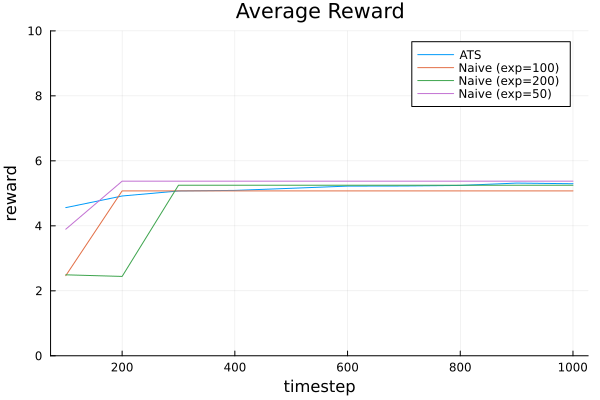

In [9]:
Figs.plot_avg_r_multiple_experiments([r_p, r_n, r_l, r_s], window, labels, "Average Reward")

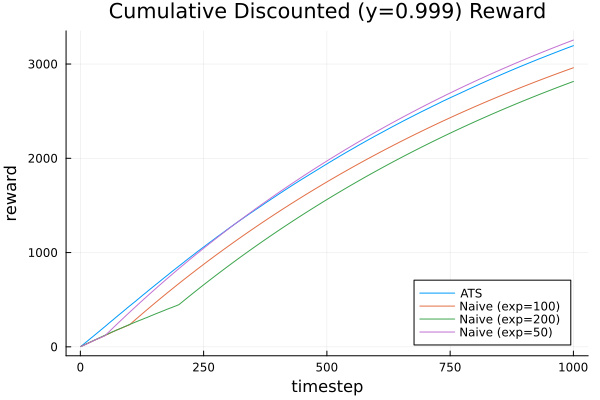

In [10]:
y = 0.999
Figs.plot_cumulative_avg_r_multiple_experiments([r_p, r_n, r_l, r_s], y, labels, "Cumulative Discounted (y="*string(y)*") Reward")

## Action Distributions

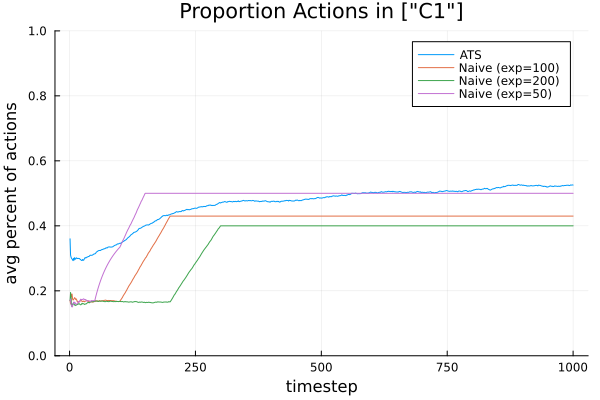

In [11]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a_p, a_n, a_l, a_s], ["C1"], window, labels, "Proportion Actions in ")

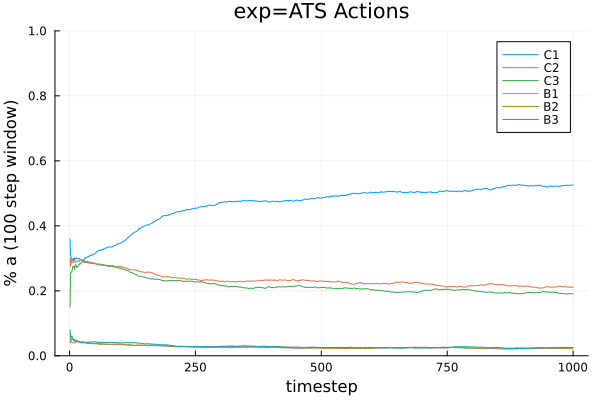

In [12]:
Figs.plot_proportion_actions_all(a_p, actions, window, "exp="*pomdp_name*" Actions")

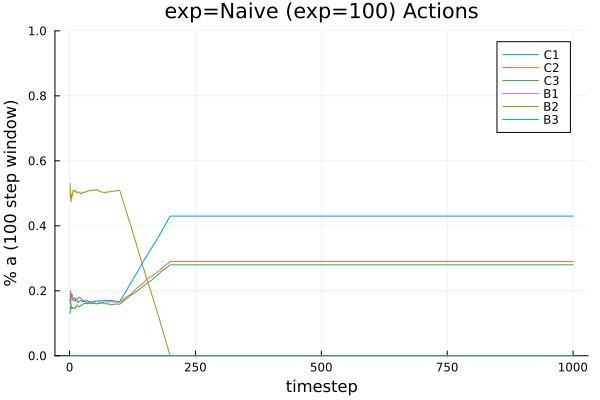

In [13]:
Figs.plot_proportion_actions_all(a_n, actions, window, "exp="*naive_name*" Actions")

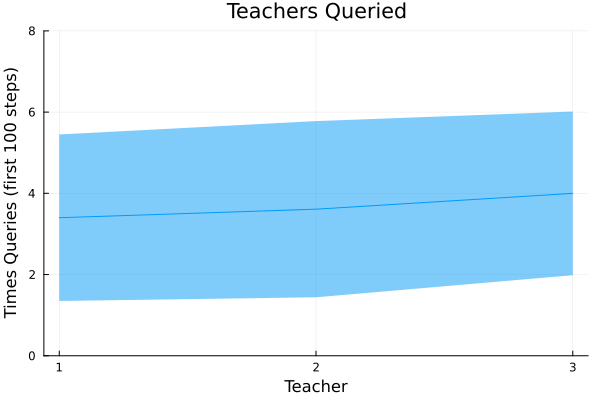

In [14]:
# count first 100 timesteps of each run (id)
b_list = ["B1", "B2", "B3"]
steps = 100
b_counts = []
for run in a_p
    b_counts_run = zeros(size(b_list)[1])
    for i in 1:steps
        action = run[i]
        id = findall(x->x==action, b_list)
        if !isempty(id)
            b_counts_run[id[1]] += 1
        end
    end
    push!(b_counts, b_counts_run)
end

avg_counts = mean(b_counts, dims=1)
sd_counts = std(b_counts)

plot(1:size(b_list)[1], avg_counts,
    ribbon = sd_counts,
    ylim = (0,8),
    xlabel = "Teacher",
    ylabel = "Times Queries (first "*string(steps)*" steps)",
    xaxis = (0:1:3),
    legend = false,
    title = "Teachers Queried")

# Investigate "Art" runs
## Import Data

In [15]:
art_pomdp_expIDs = ["221219_130514", "221219_15149", "221219_172445"]
runs = 5

@time begin
    println("importing exp="*string(pomdp_name)*" 1 (exp "*art_pomdp_expIDs[1]*") data...")
    sa_p1, ta_p1, aa_p1, ra_p1, beliefs_p1, final_states_p1, avg_belief_p1, avg_belief_u_p1 = Import.import_experiment(art_pomdp_expIDs[1], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 2 (exp "*art_pomdp_expIDs[2]*") data...")
    sa_p2, ta_p2, aa_p2, ra_p2, beliefs_p2, final_states_p2, avg_belief_p2, avg_belief_u_p2 = Import.import_experiment(art_pomdp_expIDs[2], runs, "..")
end

@time begin
    println("importing exp="*string(pomdp_name)*" 3 (exp "*art_pomdp_expIDs[3]*") data...")
    sa_p3, ta_p3, aa_p3, ra_p3, beliefs_p3, final_states_p3, avg_belief_p3, avg_belief_u_p3 = Import.import_experiment(art_pomdp_expIDs[3], runs, "..")
end

ta_p = ta_p1
sa_p = [cat(sa_p1, sa_p2, sa_p3, dims=1)[runs*i] for i in 1:3]
aa_p = cat(aa_p1, aa_p2, aa_p3, dims=1)
ra_p = cat(ra_p1, ra_p2, ra_p3, dims=1)

final_states = [final_states_p1, final_states_p2, final_states_p3]
avg_beliefs = [avg_belief_p1, avg_belief_p2, avg_belief_p3]
;

importing exp=ATS 1 (exp 221219_130514) data...
506.484147 seconds (3.98 G allocations: 152.626 GiB, 3.67% gc time, 0.08% compilation time)
importing exp=ATS 2 (exp 221219_15149) data...
510.805886 seconds (3.98 G allocations: 152.522 GiB, 3.53% gc time)
importing exp=ATS 3 (exp 221219_172445) data...
516.747497 seconds (3.98 G allocations: 152.526 GiB, 5.18% gc time)


3-element Vector{Vector{Float64}}:
 [0.0001, 0.00016000000000000004, 0.00020000000000000004, 0.00028, 0.00042000000000000007, 0.0006600000000000002, 0.0008600000000000002, 0.0011000000000000003, 0.0011200000000000001, 0.001  …  0.9236199999999146, 0.9236199999999146, 0.9236199999999146, 0.9236199999999146, 0.9236199999999146, 0.9236199999999146, 0.9236199999999146, 0.9236199999999146, 0.9236199999999146, 0.9236199999999146]
 [0.0001, 0.00026000000000000003, 0.00028000000000000003, 0.0002600000000000001, 0.00042000000000000007, 0.0005200000000000001, 0.0007000000000000001, 0.0010999999999999998, 0.0010999999999999996, 0.00218  …  0.9939999999999068, 0.9939999999999068, 0.9939999999999068, 0.9939999999999068, 0.9939999999999068, 0.9939999999999068, 0.9939999999999068, 0.9939999999999068, 0.9939999999999068, 0.9939999999999068]
 [0.0001, 0.00014000000000000001, 0.00028000000000000003, 0.00046000000000000007, 0.0005200000000000002, 0.0007000000000000001, 0.0007400000000000002, 0.0007600000

In [16]:
# all runs under a given expID have the same start state & optimal action
println("** Art domain: "*pomdp_name*" condition **")
r_max = Vector{Vector{Float64}}()
for i in 1:length(art_pomdp_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(sa_p[i])
    for y in 1:runs
        push!(r_max, [highest_R for x in 1:size(ta_p[1])[1]])
    end

    println("\nTrue State "*string(i)*":")
    print_state(sa_p[i])
    
    println("Converged States "*string(i)*":")
    println("(avg confidence: "*string(avg_beliefs[i][end])*")")
    for j in 1:runs
        println("Run "*string(j))
        print_state(final_states[i][j])
    end
end

** Art domain: ATS condition **

True State 1:
	 u: [10.0, 10.0, 6.0]
	 d1: [0.4, 0.6, 0.0]	 (exp val 10.0)
	 d2: [0.4, 0.2, 0.39999999999999997]	 (exp val 8.4)
	 d3: [0.2, 0.2, 0.6000000000000001]	 (exp val 7.6000000000000005)
Converged States 1:
(avg confidence: 0.9236199999999146)
Run 1
	 u: [10.0, 10.0, 6.0]
	 d1: [0.4, 0.6, 0.0]	 (exp val 10.0)
	 d2: [0.2, 0.2, 0.6000000000000001]	 (exp val 7.6000000000000005)
	 d3: [0.4, 0.2, 0.39999999999999997]	 (exp val 8.4)
Run 2
	 u: [10.0, 10.0, 4.0]
	 d1: [0.4, 0.6, 0.0]	 (exp val 10.0)
	 d2: [0.4, 0.2, 0.39999999999999997]	 (exp val 7.6)
	 d3: [0.4, 0.2, 0.39999999999999997]	 (exp val 7.6)
Run 3
	 u: [6.0, 10.0, 0.0]
	 d1: [0.4, 0.6, 0.0]	 (exp val 8.4)
	 d2: [0.4, 0.4, 0.19999999999999996]	 (exp val 6.4)
	 d3: [0.2, 0.2, 0.6000000000000001]	 (exp val 3.2)
Run 4
	 u: [8.0, 0.0, 6.0]
	 d1: [0.4, 0.6, 0.0]	 (exp val 3.2)
	 d2: [0.4, 0.2, 0.39999999999999997]	 (exp val 5.6)
	 d3: [0.2, 0.4, 0.4]	 (exp val 4.0)
Run 5
	 u: [10.0, 10.0, 4.0]
	 

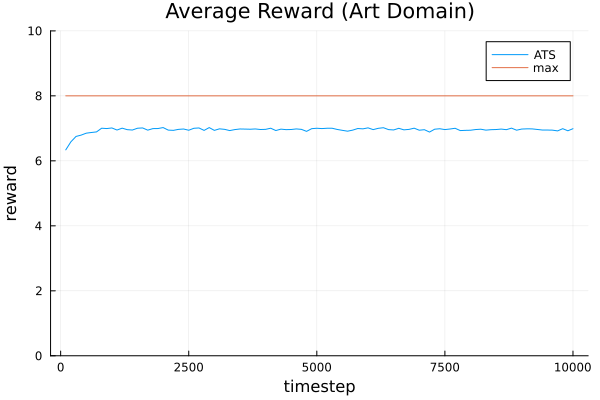

In [17]:
Figs.plot_avg_r_multiple_experiments([ra_p, r_max], window, ["ATS" "max"], "Average Reward (Art Domain)")

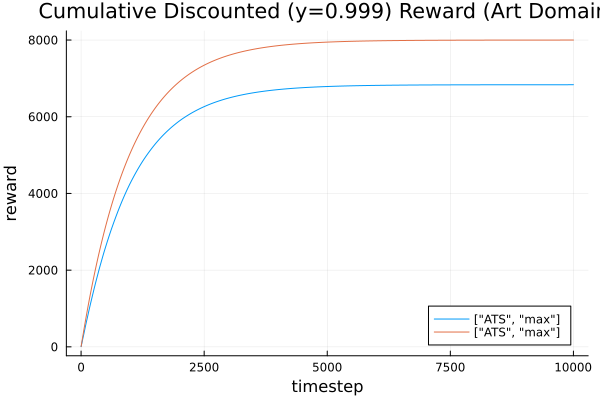

In [18]:
y = 0.999
Figs.plot_cumulative_avg_r_multiple_experiments([ra_p, r_max], y, ["ATS", "max"], "Cumulative Discounted (y="*string(y)*") Reward (Art Domain)")

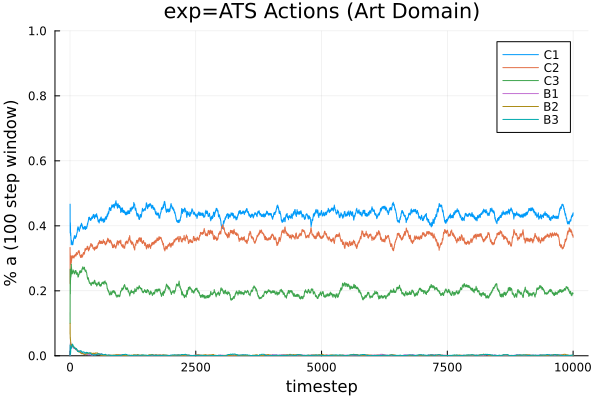

In [19]:
Figs.plot_proportion_actions_all(aa_p, actions, window, "exp="*pomdp_name*" Actions (Art Domain)")

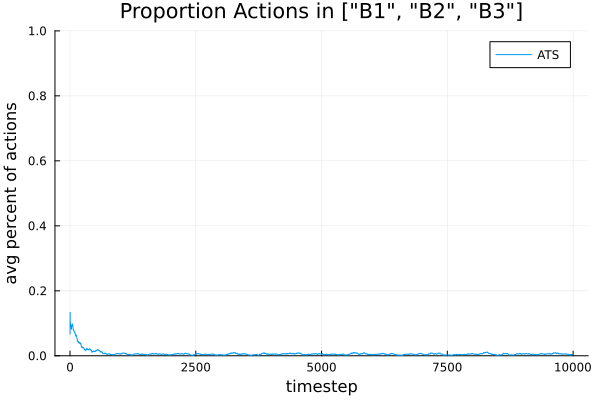

In [20]:
Figs.plot_actions_in_list_rolling_multiple_experiments([aa_p], ["B1", "B2", "B3"], window, labels, "Proportion Actions in ")
    

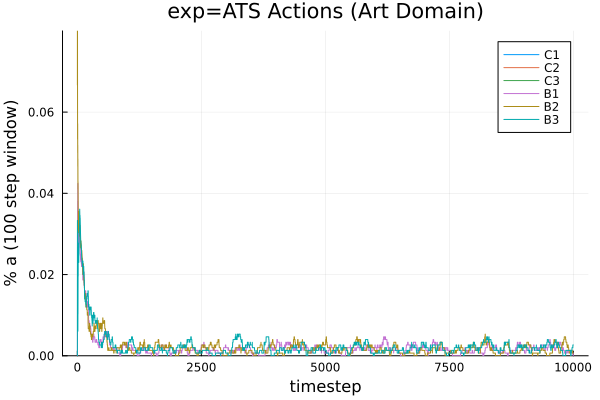

In [21]:
Figs.plot_proportion_actions_B(aa_p, actions, window, "exp="*pomdp_name*" Actions (Art Domain)")